<a href="https://colab.research.google.com/github/kamalova/Capstone/blob/main/Recommendation_Engine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Airbnb Recommendation Engine for NYC through Sentiment Analysis**

**Table of Contents**<p>
- Business Case
- Aim of the Notebook
- What is a Recommendation Engine
- Data Understanding
- Building Recommender Engine


#### **1. Business Case**<p>
**About Airbnb:** *You can host anything, anywhere, so guests can enjoy everything, everywhere.*<p>
Nowadays the demand for short and long-term temporary accommodation is increasing thanks to easing travel conditions. This demand positively affects the number of online platforms that allow you to make reservations before traveling. **Airbnb** is one such platform, which allows travelers to make accommodation reservations based on the fact that the host leases all or part of his or her home to the traveler.<p>
Customer reviews play an important role  in the customer’s decision to purchase a product or use a service. Customer preferences and opinions are affected by other customers’ reviews online, on blogs or over social networking 
platforms<p>
The main goal of this work is to combine both 
recommendation system and sentiment analysis in order to 
recommend the most accurate listings  for users based on their preferences in **New York City**. Since both domains suffer from the lack of labeled data, to overcome that, this project detects the opinions polarity score using **NLTK VADER** (Valence Aware Dictionary and Sentiment Reasoner) Lexicon.

We’ll therefore split our approaches into following sections:

- Exploring available AirBnb listings in NYC
- Measuring polarity/sentiment scores along with vader_lexicon. This polarity
measurement adapts to *pos, neu, neg*, and compound. By simply taking the compound
from these values, a new feature was created on the data.
- Building a recommendation engine with Collaborative Filtering to predict sentiment score for all reviewer-listing pairs and making personalised recommendations for each user based on their ranked preferences.

#### **2. What is a Recommendation Engine?** <p>
In general, recommendation engine consist of algorithms that can present
similar elements to users. Recommended application, articles, videos, etc. It's about the user. It analyzes the user's previous habits and makes recommendations. Each item shown to the user has a ranking. This sequence is based on the recommended system and is created by examining the user's historical data. This system consists of two
separate categories. 
**Content-Based (CB)** and **Collaborative Filtering (CF)** systems. <p>The CF
method focuses on collecting and analyzing data on user behavior, activities, and preferences, to predict what a person will like, based on their similarity to other users.

To plot and calculate these similarities, collaborative filtering uses a matrix style formula. An advantage of collaborative filtering is that it doesn’t need to analyze or understand the content (products, films, books). It simply picks items to recommend based on what they know about the user.

[more](https://www.appier.com/en/blog/what-is-a-recommendation-engine-and-how-does-it-work)

#### **3. Aim of the Notebook**<p>
 This is the last Notebook  and last project section which aims to building a recommendation engine with Collaborative Filtering to predict sentiment score for all reviewer-listing pairs and make personalised recommendations for each user based on their ranked preferences.

#### **4. Data Understanding** <p>
We will use the dataset of <mark> review_polarity</mark>  which was preprocessed during the Sentiment Analysis section. Let's dive deep into the most exciting part of the project. 

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', None)

# Data visualization
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
# Seaborn's beautiful styling
import seaborn as sns
# to get rid of the warnings
import warnings
warnings.filterwarnings("ignore")
sns.set_style('whitegrid')
from collections import Counter
from scipy import stats

from scipy.linalg import sqrtm
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
%rm -rf sample_data/

In [2]:
# Load dataset
df_reviews = pd.read_csv('/content/reviews_polarity.csv')
df_reviews

,listing_id,id,reviewer_id,reviewer_name,comments,month,weekday,language,text_length,polarity_score,sentiment_type
0,2595,19760,38960,Anita,i ve stayed with my friend at the midtown castle for six days and it was a lovely place to be a big spacious room with a pointy roof which really makes you feel like staying in a castle the location is perfect it is just a few steps from macy s time square and theatre district everything worked just perfect with the keys etc thank you so much jennifer we had a great time in new york attention it s on the floor without a lift but definetely worth it,12,Thursday,en,468,0.9274,Positive
1,2595,34320,71130,Kai-Uwe,we ve been staying here for about nights enjoying to be in the center of the city that never sleeps short ways to everywhere in manhattan by subway or by walk midtown castle is a beauftiful and tastful place jennifer and tori relaxed and friendly hosts thats why we the three berliners recommand that place good to have wifi and a little kitchen too,4,Friday,en,366,0.9136,Positive
2,2595,46312,117113,Alicia,we had a wonderful stay at jennifer s charming apartment they were very organized and helpful i would definitely recommend staying at the midtown castle,5,Tuesday,en,155,0.9409,Positive
3,2595,1238204,1783688,Sergey,hi to everyone would say our greatest compliments to jennifer the host of midtown castle we spent in this lovely apartment in the heart of manhattan one month april and will remember this time as ours best the apartment is pretty spacious and great located the th ave right around the corner there is everything you can need during your short or long stay jennifer is very friendly vigorous and very responsible host thanks her and highly recomend this apartment for everyone who are looking for a quiet place right in the center of the boiling midtown,5,Monday,en,570,0.9863,Positive
4,2595,1293632,1870771,Loïc,jennifer was very friendly and helpful and her place is exactly as advertised the location is very convenient and it was a pleasure to stay at the midtown castle i definitely recommend it thanks,5,Thursday,en,204,0.9542,Positive
...,...,...,...,...,...,...,...,...,...,...,...
70806,72265,161050979,109542482,John,vanessa was very pleasant and communication was very good,6,Friday,en,58,0.7774,Positive
70807,72265,163401732,1282541,Sofia,great location close to g train,6,Saturday,en,34,0.6249,Positive
70808,72265,252657179,8936723,Yo,highly recommend cannot beat this value great location minute walk to subway and sec to bus which connects you easily and quickly to various parts of manhattan and brooklyn organic as well as regular grocery stores and lots of awesome restaurants and stores near by very safe neighborhoods nice room not big but it s plenty enough and everything works well it s nice warm in the winter even though the bedroom is separated by a curtain to the kitchen because the host is mainly in the other section of the apartment you have a lot of privacy vanessa is a very friendly interesting and helpful host,4,Wednesday,en,626,0.9870,Positive
70809,72265,277084426,17160406,Ioannis,vanessa is a great and very polite host and gives you as much privacy as you want the room can be seen in the photos and has everything you need the location is amazing as well with plenty of bars restaurants and stores around and literally half a block away from g train,6,Friday,en,275,0.8126,Positive


In [3]:
# Print dataFrame columns
df_reviews.columns

Index(['listing_id', 'id', 'reviewer_id', 'reviewer_name', 'comments', 'month',
       'weekday', 'language', 'text_length', 'polarity_score',
       'sentiment_type'],
      dtype='object')

In [4]:
# Drop unnecessary columns
df_reviews.drop(columns=['id','comments','month','weekday','language','text_length'],inplace=True)

In [5]:
df_reviews

,listing_id,reviewer_id,reviewer_name,polarity_score,sentiment_type
0,2595,38960,Anita,0.9274,Positive
1,2595,71130,Kai-Uwe,0.9136,Positive
2,2595,117113,Alicia,0.9409,Positive
3,2595,1783688,Sergey,0.9863,Positive
4,2595,1870771,Loïc,0.9542,Positive
...,...,...,...,...,...
70806,72265,109542482,John,0.7774,Positive
70807,72265,1282541,Sofia,0.6249,Positive
70808,72265,8936723,Yo,0.9870,Positive
70809,72265,17160406,Ioannis,0.8126,Positive


In [6]:
df_reviews.polarity_score.describe()

count    70811.000000
mean         0.877807
std          0.205164
min         -0.995000
25%          0.872000
50%          0.945100
75%          0.974700
max          0.999400
Name: polarity_score, dtype: float64

In [7]:
# Install surprise package
! pip install surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 771 kB 7.4 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp38-cp38-linux_x86_64.whl size=2626469 sha256=d8cf6e8429c5eaafc4f9f01bb21054a641f910d1fc63fce70977eb0da70c693c
  Stored in directory: /root/.cache/pip/wheels/af/db/86/2c18183a80ba05da35bf0fb7417aac5cddbd93bcb1b92fd3ea
Successfully built scikit-surprise


In [8]:
# Import an additional libraries
from surprise import SVD, NMF, KNNBasic, Dataset, Reader, accuracy
from surprise.model_selection import cross_validate, train_test_split, GridSearchCV

#### **5. Building Recommender Engine**

The recommender systems will be built using surprise package (Matrix Factorization - based models).



**SVD and NMF** models comparison <p>
Singular Value Decomposition (SVD) is a  matrix factorization technique used for dimensionality reduction. Surprise package provides implementation of this algorithms.
It's clear that for the given dataset much better results can be obtained with SVD approach - both in terms of accuracy and training / testing time.

In [9]:
reader = Reader(rating_scale=(-1,1))

In [10]:
df = Dataset.load_from_df(df_reviews[['listing_id', 'reviewer_id', 'polarity_score']], reader)


In [11]:
# We'll use the famous SVD algorithm.
model_svd = SVD()
cv_results_svd = cross_validate(model_svd, df, cv=5)
pd.DataFrame(cv_results_svd).mean()


test_rmse    0.153155
test_mae     0.084649
fit_time     0.980989
test_time    0.119647
dtype: float64

##### **5.1. Optimisation of SVD Algorithm** <p>
Grid Search Cross Validation computes accuracy metrics for an algorithm on various combinations of parameters, over a cross-validation procedure. It's useful for finding the best configuration of parameters.<p>

It is used to find the best setting of parameters:

- n_factors - the number of factors
- n_epochs - the number of iteration of the SGD procedure
- lr_all - the learning rate for all parameters
- reg_all - the regularization term for all parameters<p>
As a result, regarding the majority of parameters, the default setting is the most optimal one. The improvement obtained with Grid Search is very small.

In [12]:
# Setting dictionary parameters 
param_grid = {'n_factors': [80,100,120],
              'n_epochs': [5, 10, 20],
              'lr_all': [0.002, 0.005],
              'reg_all': [0.2, 0.4, 0.6]}

GS = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)
GS.fit(df)
# Best RMSE score
print(GS.best_score['rmse'])
# Combination of parameters that gave the best RMSE score
print(GS.best_params['rmse'])


0.17197338093184888
{'n_factors': 120, 'n_epochs': 20, 'lr_all': 0.005, 'reg_all': 0.2}


#### **5.2. Analysis of Collaborative Filtering Model Results**<p>
In this part, let's examine in detail the results obtained by the SVD model that provided the best RMSE score.

In [13]:
# Split dataset into train/test sets. Test set is made of 20% of the dataset.
train_set, test_set = train_test_split(df, test_size=0.2)

# Train the algorithm on the trainset, and predict ratings for the testset
model_svd = SVD(n_factors=120, n_epochs=20, lr_all=0.005, reg_all=0.2)
model_svd.fit(train_set)
predictions = model_svd.test(test_set)


In [14]:
print('Accuracy on test data set,', end='   ')
accuracy.rmse(predictions,verbose=True)


Accuracy on test data set,   RMSE: 0.1629


0.16286347834753118

In [17]:
df_pred = pd.DataFrame(predictions, columns=['listing_id', 'reviewer_id', 'polarity_score' ,'pred_pol', 'details'])

df_pred['impossible'] = df_pred['details'].apply(lambda x: x['was_impossible'])
df_pred['pred_pol_round'] = df_pred['pred_pol'].round()
df_pred['abs_err'] = abs(df_pred['pred_pol'] - df_pred['polarity_score'])
df_pred.drop(['details'], axis=1, inplace=True)

df_pred.sample(5)


,listing_id,reviewer_id,polarity_score,pred_pol,impossible,pred_pol_round,abs_err
6770,24285,1164626,0.9715,0.894555,False,1.0,0.076945
1717,126443,32541518,0.8720,0.798278,False,1.0,0.073722
12557,10962,2619301,0.9937,0.967514,False,1.0,0.026186
13735,58059,96216333,0.9884,0.885686,False,1.0,0.102714
13978,62427,2359680,0.9723,0.929280,False,1.0,0.043020


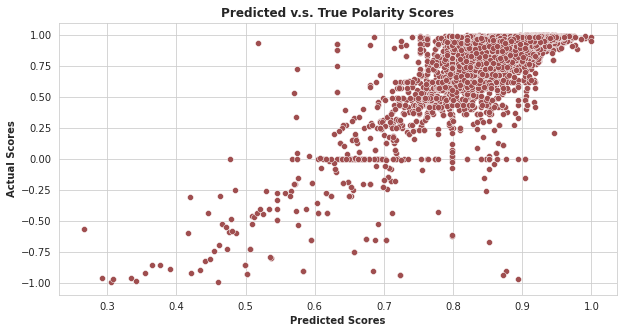

In [21]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df_pred, y='polarity_score', x='pred_pol', color='#9f4e4f')
plt.title('Predicted v.s. True Polarity Scores',fontweight="bold")
plt.xlabel('Predicted Scores', fontweight="bold")
plt.ylabel('Actual Scores', fontweight="bold");


In [38]:
df_pred[df_pred['pred_pol'].notna()].sort_values('pred_pol', ascending=False).head(5)

,listing_id,reviewer_id,polarity_score,pred_pol,impossible,pred_pol_round,abs_err
10317,53470,159014,0.9829,1.000000,False,1.0,0.017100
13609,84010,22585386,0.9535,1.000000,False,1.0,0.046500
2598,60457,290583,0.9665,0.998210,False,1.0,0.031710
1619,60457,290583,0.9665,0.998210,False,1.0,0.031710
2249,65425,140684,0.9796,0.990107,False,1.0,0.010507


#### **5.3.  Recommend listings for up to 10 Users**

In [25]:
predictions[1]

Prediction(uid=12192, iid=52696, r_ui=0.9868, est=0.8800256120553356, details={'was_impossible': False})

In [26]:
from collections import defaultdict
def get_top_recommendations(predictions, top_n ):
     
    top_recomm = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_recomm[uid].append((iid, est))
     
    for uid, user_ratings in top_recomm.items():
        user_ratings.sort(key = lambda x: x[1], reverse = True)
        top_recomm[uid] = user_ratings[:top_n]    
    return top_recomm

In [43]:
df_ex = get_top_recommendations(predictions,1)

In [46]:
df_top = pd.DataFrame(columns=['user_id', 'recommended_listing -  score'])
i=0;
for uid, user_ratings in df_ex.items():
    #print(uid, top3_recommendations[uid])
    row = [uid, df_ex[uid]]
    df_top.loc[i] = row
    i=i+1

In [49]:
df_top.head(10)

,user_id,recommended_listing - score
0,65425,"[(140684, 0.9901070001691519)]"
1,12192,"[(504513, 0.8895133763758871)]"
2,26785,"[(5048661, 0.960613585255367)]"
3,45936,"[(6341938, 0.9078099828569064)]"
4,16595,"[(97130, 0.9265327691257963)]"
5,38663,"[(6364722, 0.9210822262482603)]"
6,14314,"[(63563, 0.9375356210693635)]"
7,64365,"[(43889727, 0.923928927426699)]"
8,39572,"[(950389, 0.9224122212787231)]"
9,62427,"[(9604553, 0.945914295478733)]"
